In [1]:
%matplotlib inline

import cv2
import numpy as np
import matplotlib.pyplot as plt
import ctypes
import time
from python.calc_normals import NormalCalculation

In [2]:
file_number = 619

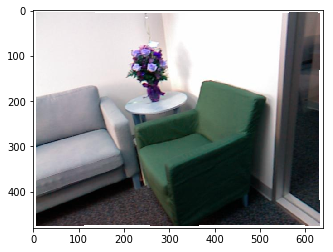

In [3]:
image = cv2.imread('/home/steve/datasets/nyu_dataset/nyu_dataset/rgb/' + str(file_number) + '.bmp')
plt.imshow(image)

uint16


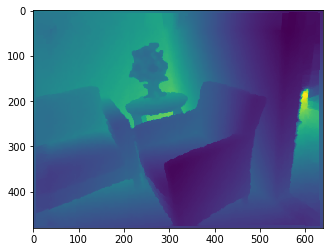

In [4]:
depth = cv2.imread('/home/steve/datasets/nyu_dataset/nyu_dataset/depth/' + str(file_number) + '.png', cv2.IMREAD_ANYDEPTH | cv2.IMREAD_ANYCOLOR)
plt.imshow(depth)
print(depth.dtype)

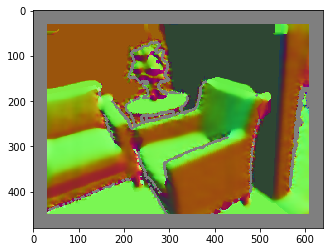

In [5]:
normals = cv2.imread('/home/steve/datasets/nyu_dataset/nyu_dataset/normals/' + str(file_number) + '.exr', cv2.IMREAD_ANYDEPTH | cv2.IMREAD_ANYCOLOR)
plt.imshow((normals + 1) / 2.0)

uint16


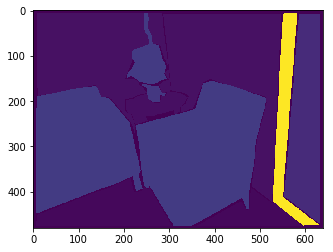

In [6]:
labels = cv2.imread('/home/steve/datasets/nyu_dataset/nyu_dataset/labels/' + str(file_number) + '.png', cv2.IMREAD_ANYDEPTH | cv2.IMREAD_ANYCOLOR)
plt.imshow(labels)
print(labels.dtype)

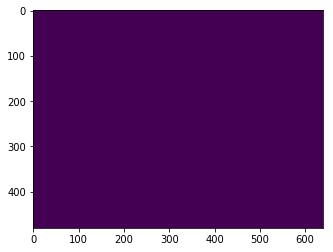

In [7]:
# Floor = 11
# Ceiling = 4
# Chairs = 5
# Walls = 21
# Paper = 15
# Table = 19
# Door = 28
# Poster = 34
# Desk = 36
# Laptop = 37
# Vent = 38?
# Whiteboard = 45
ceiling = (labels == 4)
plt.imshow(ceiling)

In [8]:
print(np.unique(labels))

[  0  11  19  21  59  78  81  83 477]


In [9]:
camera_params = [2.3844389626620386e+02,0,3.1304475870804731e+02,0,5.8269103270988637e+02,2.4273913761751615e+02,0,0,1]
normal_params = [5,0.02,30,0.04]
flat_labels = [4,11,15,19,21,28,34,36,37,45,64]
norm_calc = NormalCalculation(camera_params, normal_params, flat_labels)

In [12]:
start = time.time()
new_normals = norm_calc.Calculate(depth, labels)
end = time.time()
print(end - start)

0.106591939926


[-1.         -0.99999994 -0.99999964 ...  0.9996842   0.9999807
  0.9999833 ]


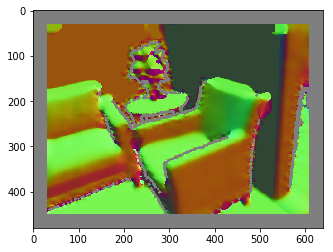

In [11]:
print np.unique(new_normals)
plt.imshow((new_normals + 1) / 2.0)